In [1]:
import os 
from glob import glob 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '20.06.22 - Analyzing Segmentation Label Dataset.ipynb',
 'ADE20K_2017_05_30_consistency']

동일한 위치에 ADE20K_2017_05_30_consistency가 있는지 확인 

In [17]:
image_paths = glob('ADE20K_2017_05_30_consistency/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*.jpg')
label_paths = glob('ADE20K_2017_05_30_consistency/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*_seg.png')
len(image_paths), len(label_paths)

(64, 64)

In [18]:
img_path = image_paths[0]
lbl_path = label_paths[0]

In [26]:
image = np.array(Image.open(img_path))
label = np.array(Image.open(lbl_path))
image.shape, label.shape

((960, 1280, 3), (960, 1280, 3))

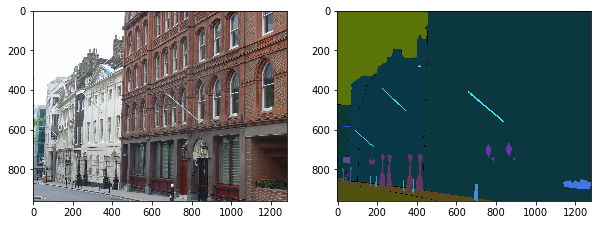

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(label)
plt.show()

### IF : 만약에 image paths와 label paths의 갯수가 다른 경우? 
- label이 또는 image 수가 적은 것 기준으로 데이터셋을 묶는다 

In [29]:
img_path

'ADE20K_2017_05_30_consistency/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_bxvctltntrtinjf.jpg'

In [30]:
lbl_path

'ADE20K_2017_05_30_consistency/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k\\labelme_bxvctltntrtinjf_seg.png'

방법.1 : 경로를 바꿔주고 없는 것들은 제거 

In [32]:
image_paths = []
for path in label_paths:
    image_path = path.replace("_seg.png", '.jpg')
    image_paths.append(image_path)

image_paths = [path.replace('_seg.png', '.jpg') for path in label_paths]
# label_paths의 경로 기준으로만 경로명을 바꿔서 가져왔기 때문에
# 이 결과로 image_paths가 label_paths와 같게 됨

In [34]:
# 만들어준 image_paths에서 해당 파일이 확실히 있긴 한지 확인 하는 작업
for path in image_paths:
    if not os.path.exists(path):
        print(path)

label_paths -> 64  
image_paths -> 80  
-> 이 때는 label 갯수가 더 적기 때문에 label에서 있는 것만 image paths 경로들을 만들 것

개인적인 경로들을 가져오는 방법 

In [38]:
# 더 적은 쪽을 기준으로 가져온다 
tmp_label_paths = glob('ADE20K_2017_05_30_consistency/ADE20K_2017_05_30_consistency/images/consistencyanalysis/original_ade20k/*_seg.png')

In [40]:
image_paths = []
label_paths = []

for lbl_path in tmp_label_paths:
    img_path = lbl_path.replace('_seg.png', '.jpg')
    if os.path.exists(img_path):  # image path가 있는지 확인하면 담는다
                                  # label path는 이미 glob로 가져왔기 때문에
                                  # label path는 따로 경로 확인 불필요
        image_paths.append(img_path)
        label_paths.append(lbl_path)  # image가 없으면 label에도 담아주면 안 됨
        
len(image_paths), len(label_paths)

(64, 64)

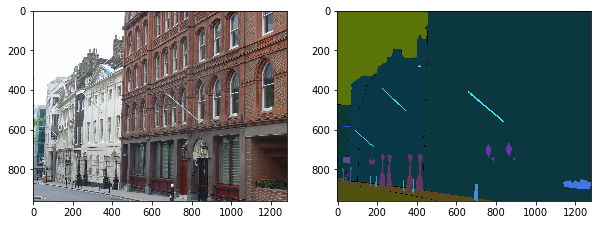

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(label)
plt.show()

In [45]:
min(len(image_paths), len(label_paths))

64